# Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\ASMIN'

# loading dataset

In [3]:
train = pd.read_csv('ML Data.csv')
train.head()

,SL No.,Gender,age,125,250,500,750,1000,1500,2000,3000,4000,6000,8000,STATUS
0,1,M,20,25,20,25,20,15,15,20,15,10,15,20,N
1,2,F,21,10,15,25,25,25,15,15,10,15,15,10,N
2,3,F,30,35,35,35,35,35,30,30,35,15,25,20,Mi
3,4,M,10,10,10,5,10,0,5,-10,-10,-10,-10,-10,N
4,5,M,8,0,-5,0,-5,5,-10,-5,-10,-5,-5,-5,N


In [4]:
test = pd.read_csv('ML TEST DATA.csv')
test.head()

,SL No.,Gender,age,125,250,500,750,1000,1500,2000,3000,4000,6000,8000
0,1,M,43,20,20,25,25,25,20,25,25,20,20,20
1,2,M,23,10,15,20,20,20,15,20,20,20,15,10
2,3,F,13,25,20,20,20,15,15,15,10,10,5,5
3,4,F,65,105,100,100,100,100,100,100,95,95,95,95
4,5,F,45,40,40,40,35,35,35,35,30,30,25,20


In [5]:
# store length of each test and train dataset
train_len = len(train)
test_len = len(test)

In [6]:
#concatenate both dataframes
df = pd.concat([train, test],axis = 0)
df.reset_index(drop = True, inplace = True)
df.head()

,SL No.,Gender,age,125,250,500,750,1000,1500,2000,3000,4000,6000,8000,STATUS
0,1,M,20,25,20,25,20,15,15,20,15,10,15,20,N
1,2,F,21,10,15,25,25,25,15,15,10,15,15,10,N
2,3,F,30,35,35,35,35,35,30,30,35,15,25,20,Mi
3,4,M,10,10,10,5,10,0,5,-10,-10,-10,-10,-10,N
4,5,M,8,0,-5,0,-5,5,-10,-5,-10,-5,-5,-5,N


In [7]:
df.tail()

,SL No.,Gender,age,125,250,500,750,1000,1500,2000,3000,4000,6000,8000,STATUS
1596,563,M,38,40,35,30,30,35,25,25,20,25,25,20,NaN
1597,564,M,20,105,105,100,100,100,105,100,100,105,100,95,NaN
1598,565,M,24,20,20,25,15,20,10,20,20,15,10,5,NaN
1599,566,M,54,20,15,15,10,15,10,0,-5,0,-10,-10,NaN
1600,567,F,38,20,20,25,25,20,25,20,20,20,10,5,NaN


In [8]:
print(len(train),len(test), len(df))

1034 567 1601


In [9]:
df = df.drop(columns = ['SL No.'])
df.head()

,Gender,age,125,250,500,750,1000,1500,2000,3000,4000,6000,8000,STATUS
0,M,20,25,20,25,20,15,15,20,15,10,15,20,N
1,F,21,10,15,25,25,25,15,15,10,15,15,10,N
2,F,30,35,35,35,35,35,30,30,35,15,25,20,Mi
3,M,10,10,10,5,10,0,5,-10,-10,-10,-10,-10,N
4,M,8,0,-5,0,-5,5,-10,-5,-10,-5,-5,-5,N


In [10]:
df.tail()

,Gender,age,125,250,500,750,1000,1500,2000,3000,4000,6000,8000,STATUS
1596,M,38,40,35,30,30,35,25,25,20,25,25,20,NaN
1597,M,20,105,105,100,100,100,105,100,100,105,100,95,NaN
1598,M,24,20,20,25,15,20,10,20,20,15,10,5,NaN
1599,M,54,20,15,15,10,15,10,0,-5,0,-10,-10,NaN
1600,F,38,20,20,25,25,20,25,20,20,20,10,5,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  1598 non-null   object
 1   age     1601 non-null   int64 
 2   125     1601 non-null   int64 
 3   250     1601 non-null   int64 
 4   500     1601 non-null   int64 
 5   750     1601 non-null   int64 
 6   1000    1601 non-null   int64 
 7   1500    1601 non-null   int64 
 8   2000    1601 non-null   int64 
 9   3000    1601 non-null   int64 
 10  4000    1601 non-null   int64 
 11  6000    1601 non-null   int64 
 12  8000    1601 non-null   int64 
 13  STATUS  1034 non-null   object
dtypes: int64(12), object(2)
memory usage: 175.2+ KB


In [12]:
df['STATUS'].value_counts()

N      644
Mi     203
Mod     90
S       40
P       30
MS      27
Name: STATUS, dtype: int64

# Prepocessing the dataset

In [13]:
df.isnull().sum()

Gender      3
age         0
125         0
250         0
500         0
750         0
1000        0
1500        0
2000        0
3000        0
4000        0
6000        0
8000        0
STATUS    567
dtype: int64

In [14]:
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [15]:
df.isnull().sum()

Gender      0
age         0
125         0
250         0
500         0
750         0
1000        0
1500        0
2000        0
3000        0
4000        0
6000        0
8000        0
STATUS    567
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

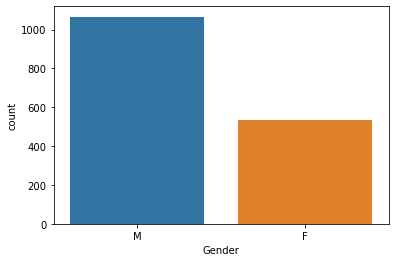

In [16]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='STATUS', ylabel='count'>

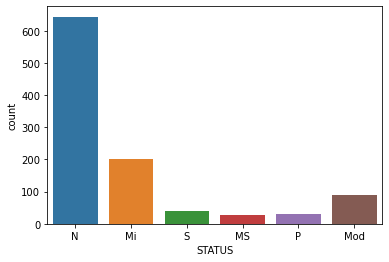

In [17]:
sns.countplot(df['STATUS'])

<AxesSubplot:xlabel='age', ylabel='count'>

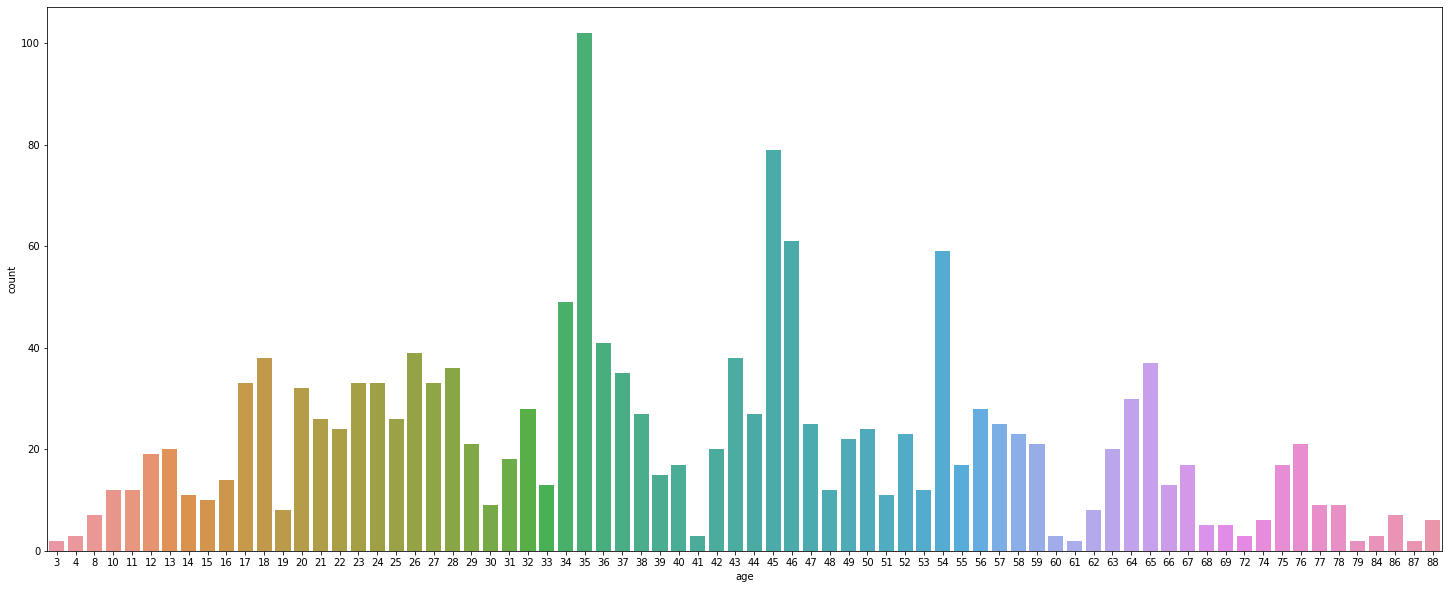

In [18]:
plt.figure(figsize=(25,10))
sns.countplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

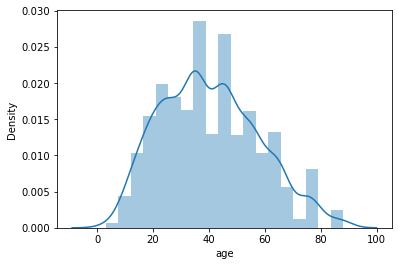

In [19]:
sns.distplot(df["age"])

<AxesSubplot:ylabel='Frequency'>

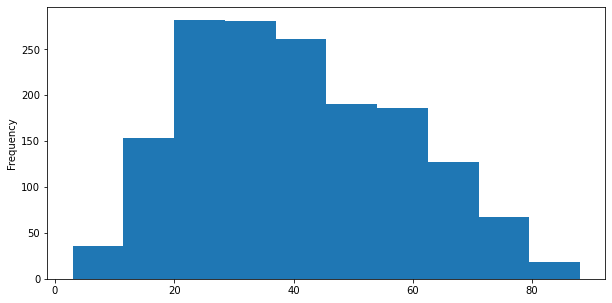

In [20]:
plt.figure(figsize=(10,5))
df['age'].plot(kind='hist')

# Co-relation Matrix

<AxesSubplot:>

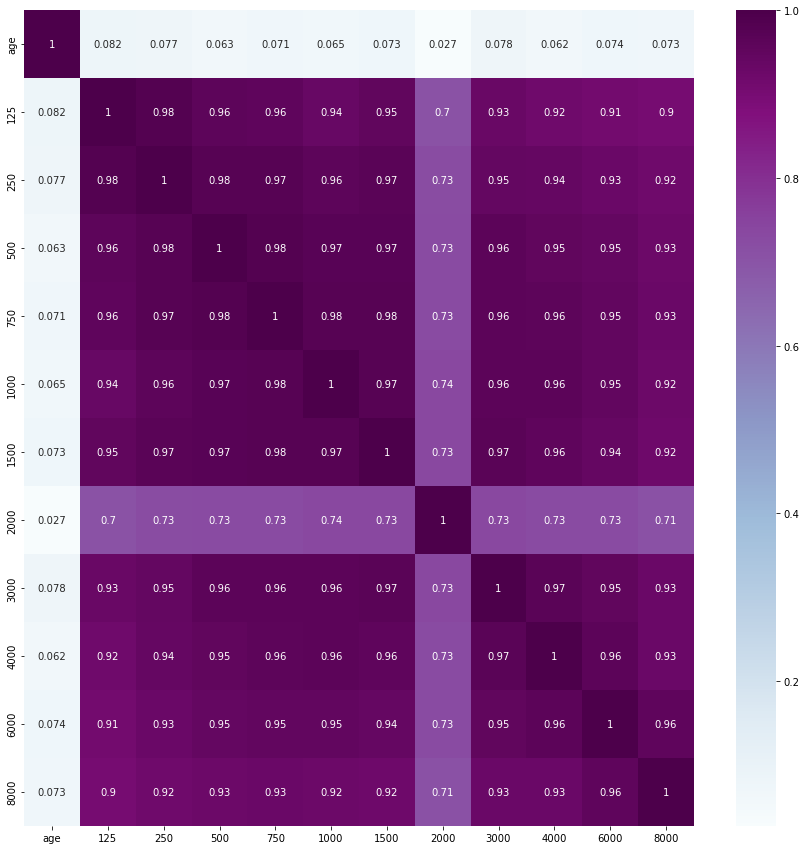

In [21]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot = True, cmap = "BuPu")

In [22]:
df.head(15)

,Gender,age,125,250,500,750,1000,1500,2000,3000,4000,6000,8000,STATUS
0,M,20,25,20,25,20,15,15,20,15,10,15,20,N
1,F,21,10,15,25,25,25,15,15,10,15,15,10,N
2,F,30,35,35,35,35,35,30,30,35,15,25,20,Mi
3,M,10,10,10,5,10,0,5,-10,-10,-10,-10,-10,N
4,M,8,0,-5,0,-5,5,-10,-5,-10,-5,-5,-5,N
5,M,35,40,45,35,35,30,35,40,30,25,25,35,Mi
6,F,30,30,40,35,30,35,20,35,20,40,20,20,Mi
7,M,45,90,85,80,85,80,75,75,75,70,65,60,S
8,M,40,60,60,55,60,50,45,60,65,65,65,60,MS
9,M,60,95,95,95,95,95,95,90,90,95,90,90,P


## Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','age','STATUS']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [24]:
df.head(15)

,Gender,age,125,250,500,750,1000,1500,2000,3000,4000,6000,8000,STATUS
0,1,13,25,20,25,20,15,15,20,15,10,15,20,3
1,0,14,10,15,25,25,25,15,15,10,15,15,10,3
2,0,23,35,35,35,35,35,30,30,35,15,25,20,1
3,1,3,10,10,5,10,0,5,-10,-10,-10,-10,-10,3
4,1,2,0,-5,0,-5,5,-10,-5,-10,-5,-5,-5,3
5,1,28,40,45,35,35,30,35,40,30,25,25,35,1
6,0,23,30,40,35,30,35,20,35,20,40,20,20,1
7,1,38,90,85,80,85,80,75,75,75,70,65,60,5
8,1,33,60,60,55,60,50,45,60,65,65,65,60,0
9,1,53,95,95,95,95,95,95,90,90,95,90,90,4


In [25]:
df.tail()

,Gender,age,125,250,500,750,1000,1500,2000,3000,4000,6000,8000,STATUS
1596,1,31,40,35,30,30,35,25,25,20,25,25,20,6
1597,1,13,105,105,100,100,100,105,100,100,105,100,95,6
1598,1,17,20,20,25,15,20,10,20,20,15,10,5,6
1599,1,47,20,15,15,10,15,10,0,-5,0,-10,-10,6
1600,0,31,20,20,25,25,20,25,20,20,20,10,5,6


## Gender: 
### M: 1, F: 0

## Status:
#### Moderate Severe (MS):0, Mild (Mi): 1, Moderate (Mod): 2, Normal (N): 3, Profound (P): 4, Severe (S): 5, None : 6.   

## Splitting Concatenated DataFrame

In [26]:
train = df.iloc[:train_len,:]
test = df.iloc[train_len:,:]

In [27]:
train.head()

,Gender,age,125,250,500,750,1000,1500,2000,3000,4000,6000,8000,STATUS
0,1,13,25,20,25,20,15,15,20,15,10,15,20,3
1,0,14,10,15,25,25,25,15,15,10,15,15,10,3
2,0,23,35,35,35,35,35,30,30,35,15,25,20,1
3,1,3,10,10,5,10,0,5,-10,-10,-10,-10,-10,3
4,1,2,0,-5,0,-5,5,-10,-5,-10,-5,-5,-5,3


In [28]:
#specifiy input and output attributes
X = train.drop(columns = ['STATUS'], axis = 1)
y = train['STATUS']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modelling Training

In [30]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 66.40926640926641
Cross validation is 70.50091459124806


In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 98.45559845559846
Cross validation is 99.90338164251207


In [33]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 98.45559845559846
Cross validation is 100.0


In [34]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 99.22779922779922
Cross validation is 100.0


## Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[  4,   0,   0,   0,   0,   0],
       [  0,  65,   0,   0,   0,   0],
       [  0,   0,  20,   0,   0,   0],
       [  0,   2,   0, 154,   0,   0],
       [  0,   0,   0,   0,   4,   0],
       [  0,   0,   0,   0,   0,  10]], dtype=int64)

<AxesSubplot:>

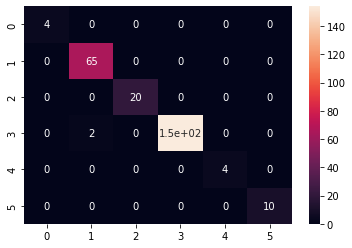

In [36]:
sns.heatmap(cm, annot=True)

## Prediction on test data

In [37]:
X_test = test.drop(columns = ['STATUS'], axis = 1)
X_test.head()

,Gender,age,125,250,500,750,1000,1500,2000,3000,4000,6000,8000
1034,1,36,20,20,25,25,25,20,25,25,20,20,20
1035,1,16,10,15,20,20,20,15,20,20,20,15,10
1036,0,6,25,20,20,20,15,15,15,10,10,5,5
1037,0,58,105,100,100,100,100,100,100,95,95,95,95
1038,0,38,40,40,40,35,35,35,35,30,30,25,20


In [38]:
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [39]:
pred = model.predict(X_test)
pred

array([3, 3, 3, 4, 1, 1, 3, 2, 2, 5, 3, 1, 3, 3, 1, 2, 1, 3, 2, 3, 4, 1,
       1, 1, 1, 2, 3, 1, 1, 3, 3, 1, 1, 1, 3, 2, 2, 3, 2, 1, 5, 0, 3, 1,
       1, 3, 3, 4, 2, 1, 5, 0, 3, 3, 3, 3, 3, 3, 3, 1, 2, 5, 1, 1, 4, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 4, 3, 2, 2, 3, 3, 3, 4, 5, 2, 5,
       0, 1, 2, 1, 1, 3, 3, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3,
       3, 3, 3, 3, 1, 4, 3, 3, 3, 3, 3, 3, 1, 0, 2, 1, 1, 1, 3, 2, 5, 1,
       3, 3, 3, 3, 4, 0, 3, 3, 3, 5, 1, 0, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 5, 3, 2, 2, 1, 3, 3, 3, 1, 1, 1, 1, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 1, 1, 3, 3, 3, 4, 5, 3, 3, 5, 3, 3, 3, 5, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 3, 1, 1,
       5, 0, 2, 3, 3, 3, 3, 3, 3, 1, 2, 4, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1,
       1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [40]:
submission = pd.DataFrame()
submission['Gender'] = test['Gender']
submission['age'] = test['age']
submission['125'] = test['125']
submission['250'] = test['250']
submission['500'] = test['500']
submission['750'] = test['750']
submission['1000'] = test['1000']
submission['1500'] = test['1500']
submission['2000'] = test['2000']
submission['3000'] = test['3000']
submission['4000'] = test['4000']
submission['6000'] = test['6000']
submission['8000'] = test['8000']
submission['STATUS']  = pred
submission.head()

,Gender,age,125,250,500,750,1000,1500,2000,3000,4000,6000,8000,STATUS
1034,1,36,20,20,25,25,25,20,25,25,20,20,20,3
1035,1,16,10,15,20,20,20,15,20,20,20,15,10,3
1036,0,6,25,20,20,20,15,15,15,10,10,5,5,3
1037,0,58,105,100,100,100,100,100,100,95,95,95,95,4
1038,0,38,40,40,40,35,35,35,35,30,30,25,20,1


In [41]:
submission.to_csv('Final.csv',index = False)

## test on realtime data

In [42]:
X_test.head()

,Gender,age,125,250,500,750,1000,1500,2000,3000,4000,6000,8000
1034,1,36,20,20,25,25,25,20,25,25,20,20,20
1035,1,16,10,15,20,20,20,15,20,20,20,15,10
1036,0,6,25,20,20,20,15,15,15,10,10,5,5
1037,0,58,105,100,100,100,100,100,100,95,95,95,95
1038,0,38,40,40,40,35,35,35,35,30,30,25,20


In [43]:
X_test.iloc[0]

Gender     1
age       36
125       20
250       20
500       25
750       25
1000      25
1500      20
2000      25
3000      25
4000      20
6000      20
8000      20
Name: 1034, dtype: int64

In [44]:
model.predict([X_test.iloc[0]])

array([3])

In [45]:
model.predict([[1,23,10,10,10,10,10,10,10,5,5,0,-5]])

array([3])

In [46]:
model.predict([[1,75,60,65,65,60,65,60,50,55,55,50,55]])

array([0])

In [47]:
model.predict([[0,30,35,35,35,35,30,30,30,35,15,25,20]])

array([1])